# Analysis and visualization for the Ford goBike Data
## by Khaled Emad

## Investigation Overview

> In this presintation I will analyse the relation between the types of the user and the gender in the features of age , hour of the day , week of the day and the trip duration 

## Dataset Overview

> the dataset contains 16 features and 183412 raws the features are trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

# suppress warnings from final output
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
df.dropna(axis = 0, inplace=True)

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#change the start_station_id and end_station_id and bike_id from float to str
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
#change the User_type and member_gender from object to category
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
#chang the member birth year from float to int 
df['member_birth_year'] = df['member_birth_year'].astype('int')

In [5]:
df['member_age'] = 2021 - df['member_birth_year']
df['member_age'] = df['member_age'].astype('int')

In [6]:
df['duration_minute'] = df['duration_sec']/60
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')

In [7]:
df = df.query('member_age <= 80')

## User age visualization

> In the following graph the variance user age will be shown 

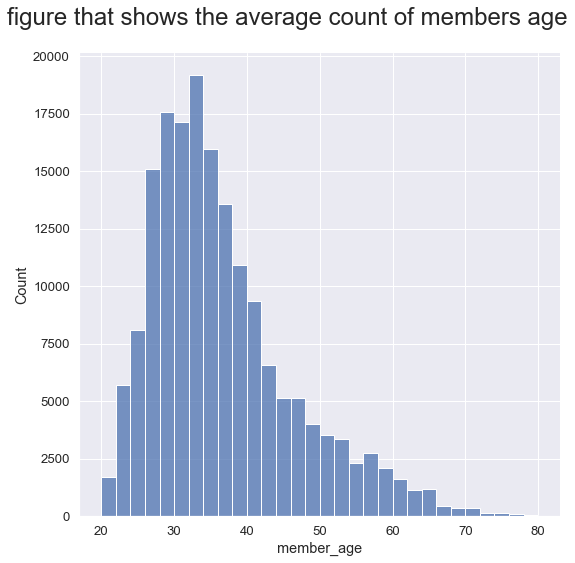

In [8]:
g=sns.displot(df['member_age'],kde=False, bins=30,height=8,aspect=1);
g.fig.suptitle("figure that shows the average count of members age",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)

## Count of Bikers in evey day of the week

> In the next graph the users count in every day of the week will be shown 

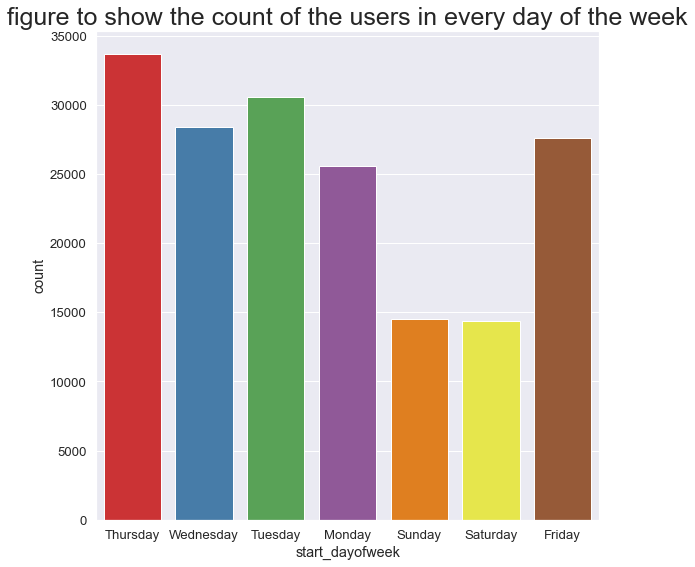

In [9]:
sns.countplot(x='start_dayofweek', data=df, palette='Set1').set_title("figure to show the count of the users in every day of the week",size=25);

## The customer VS the subscriber in evey hour of the day 
>In the next figure The count of subscribed and the customers will be shown in every hour

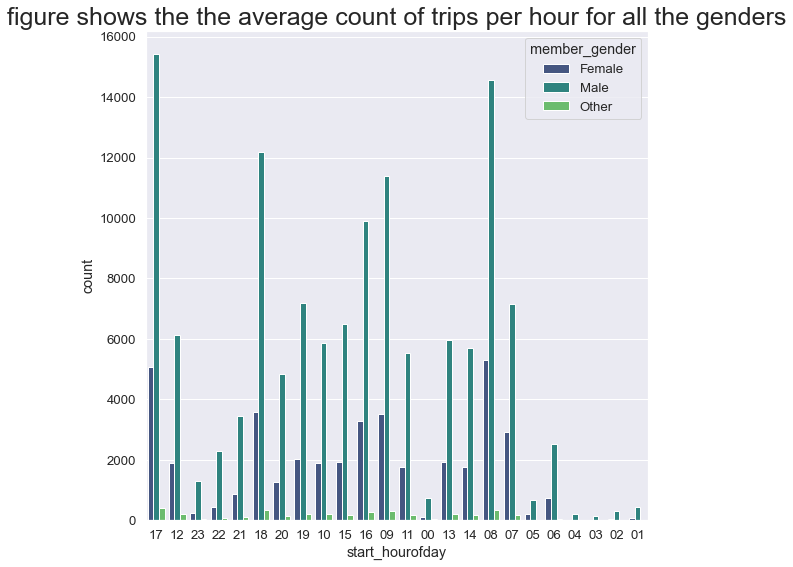

In [10]:
sns.countplot(x='start_hourofday', data=df, hue='member_gender', palette='viridis').set_title("figure shows the the average count of trips per hour for all the genders",size=25);

## Customer vs Subscriber day of the week count for every gender
>The graph will show the customers and the subscribers count for every day of the week and for every gender 

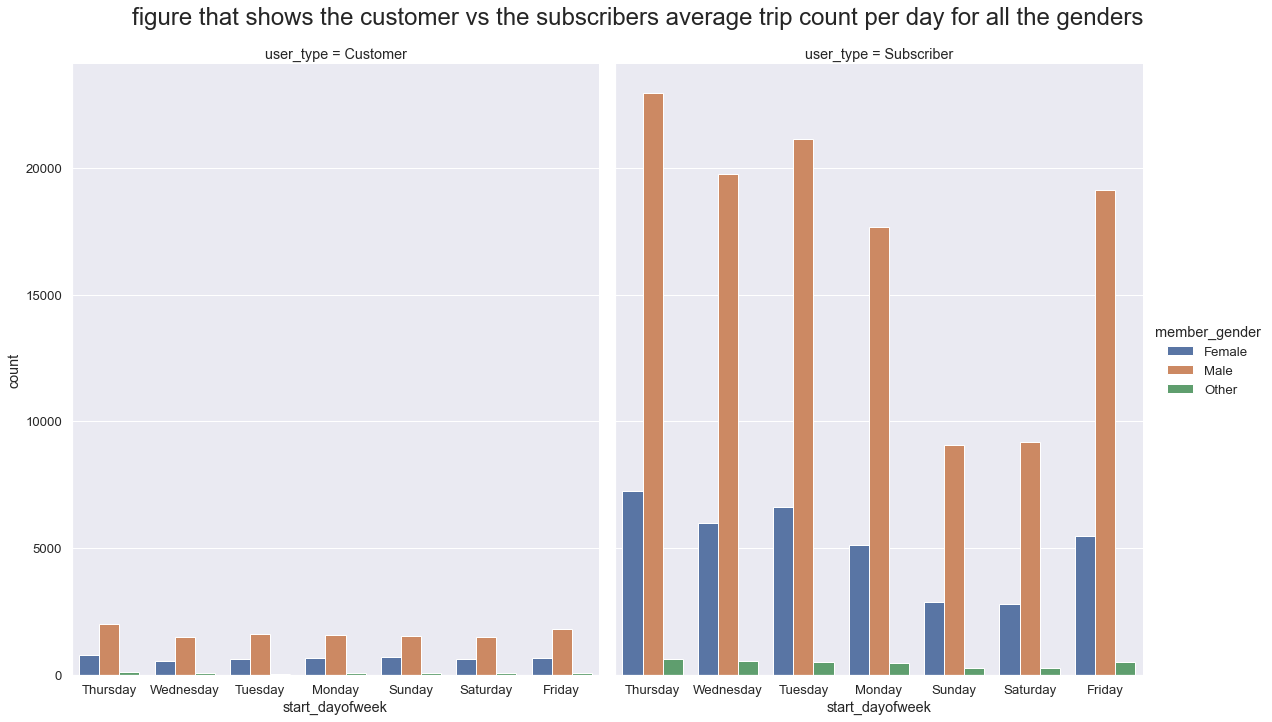

In [11]:
g = sns.catplot(x="start_dayofweek", hue="member_gender", col="user_type",
                data=df, kind="count",
                height=10, aspect=0.8);
g.fig.suptitle("figure that shows the customer vs the subscribers average trip count per day for all the genders",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)
